# Advanced Text Analytics Lab 1

This notebook is the first of two lab notebooks that you will submit as part of your assessment for the Advanced Data Analytics unit. 

This notebook is contains three sections:
1. **Word embeddings:** This will introduce you to loading and training word embeddings using the Gensim library.
2. **Introducing neural text classifiers:** Here we show you how to construct a neural network text classifier for sentiment analysis using Pytorch. 
3. **Improving neural text classifiers:** This section gives you a chance to improve the classifier from the previous section by applying what we have learned in the lectures.

## Learning Outcomes

These sections will contain tutorial-like instructions, as you have seen in previous text analytics labs. On completing these sections, the intended learning outcomes are that you will be able to...
1. Load pretrained word embeddings models.
1. Learn word embeddings from an unlabelled dataset.
1. Recognise the steps required to train and test a neural text classifier with Pytorch
1. Adapt the architecture of a neural text classifier.

## Getting Started -- Python Packages

Please see the README.md file for instructions on setting up your Python environment. The readme will instruct you to install the required packages, in addition to those used for Introduction to Data Analytics:

 * pytorch=1.9.0
 * scipy=1.8.0
 * transformers=2.1.1

## Your Tasks

Inside each of these sections there are several **'To-do's**, which you must complete for your summative assessment. Your marks will be based on your answers to these to-dos. Please make sure to:
1. Include the output of your code in the saved notebook. Plots and printed output should be visible without re-running the code. 
1. Include all code needed to generate your answers.
1. Provide sufficient comments to understand how your method works.
1. Write text in a cell in markdown format where a written answer is required. You can convert a cell to markdown format by pressing Escape-M. 

There are also some unmarked 'to-do's that are part of the tutorial to help you learn how to implement and use the methods studied here. These do not contribute to your final marks.

## Good Academic Practice

Please follow [the guidance on academic integrity provided by the university](http://www.bristol.ac.uk/students/support/academic-advice/academic-integrity/).
You are required to write your own answers -- do not share your notebooks or copy someone else's writing. Do not copy text or long blocks of code directly into the notebook from online sources -- always rewrite in your own way. Breaking the rules can lead to strong penalties. 

## Marking Criteria

1. The coursework (both notebooks) is worth 30% of the unit in total. 
1. There is a total of 100 marks available for both lab notebooks. 
1. This notebook is worth 50 of those marks.
1. The number of marks for each to-do out of 100 is shown alongside each to-do.
1. For to-dos that require you to write code, a good solution would meet the following criteria (in order of importance):
   1. Solves the task or answers the question asked in the to-do. This means, if the code cells in the notebook are executed in order, we will get the output shown in your notebook.
   1. The code is easy to follow and does not contain unnecessary steps.
   1. The comments show that you understand how your solution works.
   1. A very good answer will also provide code that is computationally efficient but easy to read.
1. You can use any suitable publicly available libraries. Unless the task explicitly asks you to implement something from scratch, there is no penalty for using libraries to implement some steps.

## Support

The main source of support will be during the remaining lab sessions (Fridays 3-6pm) for this unit. 

The TAs and lecturer will help you with questions about the lectures, the code provided for you in this notebook, and general questions about the topics we cover. For the marked 'to-dos', they can only answer clarifying questions about what you have to do. 

Office hours: You can book office hours with Edwin on Mondays 3pm-5pm by sending him an email (edwin.simpson@bristol.ac.uk). If those times are not possible for you, please contact him by email to request an alternative. 

## Deadline

The notebook must be submitted along with the second notebook on Blackboard before **Wednesday 24th May at 13.00**. 

## Submission

You will need to zip up this notebook and the next notebook into a single .zip file, which you will submit to Blackboard through the 'assessment, submission and feedback' link on the left sidebar. 

Please name your files like this:
   * Name this notebook ADA1_<student_number>.ipynb
   * Name the zip file <student_number>.zip
   * Please don't include your name as we want to mark anonymously to ensure fairness. 

# 1. Word Embeddings (max. 12 marks)

In this section we will use both sparse vectors and dense word2vec embeddings to obtain
vector representations of words and documents. 

First, we will load the `tweet eval` sentiment dataset.

In [19]:
import numpy as np
import torch

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from datasets import load_dataset
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

cache_dir = "./data_cache"

train_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="train",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Training dataset with {len(train_dataset)} instances loaded")


dev_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="validation",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Development/validation dataset with {len(dev_dataset)} instances loaded")


test_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="test",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Test dataset with {len(test_dataset)} instances loaded")

# Put the data into lists ready for the next steps...
train_texts = []
train_labels = []
for i in tqdm(range(len(train_dataset))):
    train_texts.append(train_dataset[i]['text'])
    train_labels.append(train_dataset[i]['label'])
            
# HINT: A count vectorizer object may be useful in later steps
vectorizer = CountVectorizer()
vectorizer.fit(train_texts)

# Get the vocabulary
vocab = vectorizer.vocabulary_
vocab_size = len(vocab)
print(f'The vocabulary has {vocab_size} words')

# invert the vocabulary dictionary so we can look up word types given an index
keys = vocab.values()
values = vocab.keys()
vocab_inverted = dict(zip(keys, values))

print(f'Index of "love" is {vocab["love"]}')

Found cached dataset tweet_eval (C:/Users/Morg/OneDrive/Documents/MSc/TB2/advanced_data_analytics/text_analytics/advanced-labs-public/data_cache/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Training dataset with 45615 instances loaded


Found cached dataset tweet_eval (C:/Users/Morg/OneDrive/Documents/MSc/TB2/advanced_data_analytics/text_analytics/advanced-labs-public/data_cache/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Development/validation dataset with 2000 instances loaded


Found cached dataset tweet_eval (C:/Users/Morg/OneDrive/Documents/MSc/TB2/advanced_data_analytics/text_analytics/advanced-labs-public/data_cache/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Test dataset with 12284 instances loaded


100%|██████████████████████████████████████████████████████████████████████████| 45615/45615 [00:16<00:00, 2839.07it/s]


The vocabulary has 43358 words
Index of "love" is 22981


## 1.1. Term-Document Matrix

First we are going to obtain sparse word vectors from a term-document matrix.

**TO-DO 1a:** Use CountVectorizer to obtain a term-document matrix for the training set. Then, write a function that takes a word as an argument and returns its term vector from the term-document matrix you computed. Get the term vector for the word 'love'. **(4 marks)**

In [21]:
X = vectorizer.transform(train_texts)

def get_term_vec(td_matrix, word):
    idx = vocab[word]  # gets index of the word in the vocabulary
    return td_matrix.T[idx]  # use transpose to get the word vector for the corresponding index

love_vec = get_term_vec(X, 'love')

In [22]:
# Define a list of words for comparison with 'love' in the next to-do.
comparison_words = ['2wee', '4your', 'follow', 'goodnight', 'liam', 'lol', 'okay', 'sorry',
 'wish', 'yea', 'affair', 'agree', 'all', 'alliums', 'alliumsvancouver', 'always',
 'amazing', 'and', 'appreciate', 'ask', 'babe', 'baby', 'bandit76044', 'barat',
 'beautiful', 'birthday', 'boy', 'bro', 'btw', 'but', 'commando', 'content',
 'dear', 'dm', 'dream', 'dreams', 'enjoy', 'enjoyed', 'everything', 'fam',
 'followers', 'for', 'forever', 'forget', 'friend', 'friends', 'gabrielle',
 'girl', 'god', 'good', 'guys', 'hahaha', 'happy', 'hate', 'hello', 'hey',
 'homework', 'hope', 'in', 'invite', 'is', 'isabel', 'it', 'jonny', 'kiss', 'know',
 'krishna', 'ladies', 'let', 'life', 'like', 'lil', 'little', 'love', 'loved',
 'loves', 'loving', 'lucky', 'luv', 'ma', 'may', 'me', 'mean', 'meet', 'met', 'miss',
 'much', 'my', 'notice', 'nsfanfic', 'nuffsaid', 'nya', 'of', 'on', 'one',
 'ontario', 'perfect', 'prefer', 'queen', 'rails', 'rather', 'recommend',
 'remember', 'see', 'share', 'sing', 'smile', 'so', 'suggest', 'sunat', 'sweet',
 'tag', 'tail', 'tebaklagu', 'thank', 'thanks', 'the', 'this', 'thsoul', 'to',
 'tomorrow', 'too', 'true', 'unreservedly', 'user', 'want', 'weed', 'what', 'wish',
 'wishes', 'with', 'women_of_christ', 'would', 'wow', 'xxxxxx', 'yay', 'yes',
 'you', 'your', 'zorro',
]

**TO-DO 1b:** Write a function that computes the similarity between two different term vectors. For this to-do, do not simply call a library function that implements a similarity function, implement the calculation yourself. Use the function to find the five most similar terms to "love" from the list of `comparison_words` given above. **(6 marks)**

In [23]:
def cos_sim(a, b):
    dot_p = np.dot(a.toarray(), b.T.toarray())  # dot product of both word vectors
    norm_mult = np.linalg.norm(a.toarray()) * np.linalg.norm(b.toarray())  # multiply the norm of each word vector
    return dot_p[0][0] / norm_mult  # returns cosine similarity

word_sims = []

for word in comparison_words:
    term_vec = get_term_vec(X, word)  # gets vector for corresponding term
    word_sims.append(cos_sim(love_vec, term_vec))  # appends cos sims of each term and 'love' to a list
    
np.array(comparison_words)[(np.argsort(np.array(word_sims)))][::-1][0:5]  # returns an array of the top most similar comparison words

array(['love', 'you', 'user', 'the', 'and'], dtype='<U16')

## 1.2 Word Embeddings

Now, we will use Gensim to train a word2vec model. The code below tokenizes the training texts, then runs word2vec (the skipgram model) to learn a set of embeddings. 

In [24]:
from gensim.models import word2vec
from gensim.utils import tokenize

tokenized_texts = [list(tokenize(text)) for text in train_texts]
emb_model = word2vec.Word2Vec(tokenized_texts, sg=1, min_count=1, window=3, vector_size=100)

In [25]:
# get the word vector for 'love'
love_embedding = emb_model.wv['love']

**TODO 1c:** Find the five most similar words to 'love' according to your word2vec model. You can use the Gensim function `similar_by_word` to do this. How does the Word2Vec top 5 differ from the top 5 comparison words found using the term-document matrix? **(2 marks)**

**ANSWER:** The Word2Vec words are semantically similar to 'love'. Whereas, the comparison words found using the term-document matrix are words that co-occur frequently with 'love' syntactically.

In [27]:
emb_model.wv.similar_by_word('love', topn=6)

[('appreciate', 0.8474551439285278),
 ('Wish', 0.8440349102020264),
 ('god', 0.8343996405601501),
 ('dear', 0.8342585563659668),
 ('recommend', 0.830489993095398),
 ('loving', 0.8299885392189026)]

Above, we trained our own model using the skipgram method. We can also download a pretrained model that has previously been trained on a large corpus. There is a list of models available [here](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models). Let's try out GLoVe embeddings. GLoVe is an alternative to the skipgram model. This model was trained on a corpus of tweets:

In [28]:
import gensim.downloader

glove_wv = gensim.downloader.load('glove-twitter-25')

# show the vector for Hamlet:
print(glove_wv['love'])

[-0.62645  -0.082389  0.070538  0.5782   -0.87199  -0.14816   2.2315
  0.98573  -1.3154   -0.34921  -0.8847    0.14585  -4.97     -0.73369
 -0.94359   0.035859 -0.026733 -0.77538  -0.30014   0.48853  -0.16678
 -0.016651 -0.53164   0.64236  -0.10922 ]


TODO 1d: Find the most similar five words to 'happy' according to the GloVe Twitter model. (this task is unmarked)

Notice again that a different set of words are favoured than with word2vec or term-document vectors, and consider how this might result from pretraining the embeddings on Twitter data.

# 2. Introducing Neural Text Classifiers (max. 16 marks)

This section shows you how to implement a neural network classifier using Pytorch and leads you through the steps required to process text sequences.

There are several big advantages to building a text classifier using a neural network:
   * It can model nonlinear functions, so can handle much more complex relationships between features and class labels.
   * It performs representation learning: the hidden layers learn how to extract features from low-level data.
   * It can process sequences of tokens -- we don't have to think in terms of a single feature vector representing a document as we did for logistic regression.
  
The downsides are:
   * Much more expensive to train and test.
   * It can overfit very badly to small datasets.
   * The features learned by the hidden layers can be hard to interpret, which can make it hard to predict the model's behaviour, e.g., what sort of cases it may fail on.
   
Let's start by building a neural network text classifier that takes a sequence of tokens as input, and predicts a class label. For simplicity, it will use a single fully connected feedforward layer. 


We are going to construct the neural network in this form:

<img src="neural_text_classifier_smaller.png" alt="Neural text classifier diagram" width="600px"/>

The first step -- as always -- is to get our data into the right format. We start from a set of tokenised documents (in this case, tweets), where each document is represented as a sequence of text tokens. The neural network cannot process the tokens as strings, so we need to convert each token to a numerical input value. The input value for each token is used to look up the corresponding embedding in the embedding layer. For PyTorch, it's not necessary to create one-hot vectors for each token, as library just uses the indexes of the words in the vocabulary to look up the corresponding word embedding. 

So, let's now map the tokens to their IDs -- their indexes in the vocabulary:

In [29]:
# tokenize training set and convert to input IDs.
def encode_text(sample):
    tokens = tokenize(sample['text'])  # Tokenize one document
    
    input_ids = []
    for token in tokens:
        if str.lower(token) in vocab:  # Skip words from the dev/test set that are not in the vocabulary.
            input_ids.append(vocab[str.lower(token)]+1) # +1 is needed because we reserve 0 as a special character
            
    sample['input_ids'] = input_ids 
    return sample

# The map method of the dataset object takes a function as its argument, 
# and applies that function to each document in the dataset.
train_dataset = train_dataset.map(encode_text)
len(train_dataset)

Loading cached processed dataset at C:\Users\Morg\OneDrive\Documents\MSc\TB2\advanced_data_analytics\text_analytics\advanced-labs-public\data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343\cache-9d9026ae5ba62cd4.arrow


45615

Our neural network's input layer has a fixed size, so we need to make all of our documents have the same number of tokens. Let's plot a histogram to understand the length distribution of the texts in the training set:

Mean of the document length: 18.160166611860134
Median of the document length: 18.0
Maximum document length: 32


(array([   21.,   522.,  2430.,  4908.,  7772., 11003., 10389.,  6738.,
         1719.,   113.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

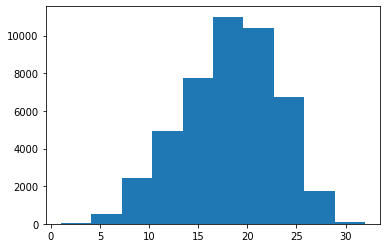

In [30]:
import matplotlib.pyplot as plt

rv_l = [len(doc) for doc in train_dataset['input_ids']]
print('Mean of the document length: {}'.format(np.mean(rv_l)))
print('Median of the document length: {}'.format(np.median(rv_l)))
print('Maximum document length: {}'.format(np.max(rv_l)))

plt.hist(rv_l)

We now neeed to choose a fixed sequence length, then *pad* the documents that are shorter than this maximum by adding a special token to the start of the sequence. The special pad token has an input value of 0. Any documents that exceed the length will be truncated.

**TO-DO 2a:** Complete the padding code below to insert 0s at the start of any sequences that are too short, and to truncate any sequences that are too long. **(3 marks)**

In [31]:
sequence_length = 40  # truncate all docs longer than this. Pad all docs shorter than this.

def pad_text(sample):
    if len(sample['input_ids']) < 40:
        padded_list = [0 for i in range(sequence_length - len(sample['input_ids']))]  # add (40 - number of tokens in the sample) zeros to the start of the list
        for idx in sample['input_ids']:
            padded_list.append(idx)  # add the tokens in the sample to the end of the list for a total length of 40
        sample['input_ids'] = padded_list
    else:
        sample['input_ids'] = sample['input_ids'][0:40]  # truncate texts that are longer than 40 tokens
    return sample

# The map method will call pad_text for every document in the dataset
train_dataset = train_dataset.map(pad_text)

Loading cached processed dataset at C:\Users\Morg\OneDrive\Documents\MSc\TB2\advanced_data_analytics\text_analytics\advanced-labs-public\data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343\cache-f80f072fb6f69fdb.arrow


We now have our data in almost the right format! To train a model using PyTorch, we are going to wrap our dataset in a [DataLoader object](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). This allows the training process to select random subsets of the dataset -- mini-batches -- which it will use for learning with mini-batch stochastic gradient descent.

In [32]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 64

# convert from the Huggingface format to a TensorDataset so we can use the mini-batch sampling functionality
def convert_to_data_loader(dataset, num_classes):
    # convert from list to tensor
    input_tensor = torch.from_numpy(np.array(dataset['input_ids']))
    label_tensor = torch.from_numpy(np.array(dataset['label'])).long()
    tensor_dataset = TensorDataset(input_tensor, label_tensor)
    loader = DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)

    return loader

num_classes = len(np.unique(train_labels))   # number of possible labels in the sentiment analysis task

train_loader = convert_to_data_loader(train_dataset, num_classes)

Let's process the development and test set as well.

In [33]:
dev_dataset = dev_dataset.map(encode_text)
dev_dataset = dev_dataset.map(pad_text)
dev_loader = convert_to_data_loader(dev_dataset, num_classes)

test_dataset = test_dataset.map(encode_text)
test_dataset = test_dataset.map(pad_text)
test_loader = convert_to_data_loader(test_dataset, num_classes)

Loading cached processed dataset at C:\Users\Morg\OneDrive\Documents\MSc\TB2\advanced_data_analytics\text_analytics\advanced-labs-public\data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343\cache-05659c67a7f822c7.arrow
Loading cached processed dataset at C:\Users\Morg\OneDrive\Documents\MSc\TB2\advanced_data_analytics\text_analytics\advanced-labs-public\data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343\cache-a47e698502cb2ccb.arrow
Loading cached processed dataset at C:\Users\Morg\OneDrive\Documents\MSc\TB2\advanced_data_analytics\text_analytics\advanced-labs-public\data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343\cache-845be0dc551ecfa5.arrow
Loading cached processed dataset at C:\Users\Morg\OneDrive\Documents\MSc\TB2\advanced_data_analytics\text_analytics\advanced-labs-public\data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e9

As shown in the diagram above, we will build a NN with three different layers for sentiment classification.

### Embedding layer
In the embedding layer, the network will create its own embeddings for the index with a given embedding dimension.
The module `nn.Embedding()` creates a simple lookup table that stores embeddings of a fixed dictionary and size.
This module is often used to store word embeddings and retrieve them using indices.
The module's input is a list of indices, and the output is the corresponding word embeddings.

[Documentation for Embedding Class](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)

### Fully-connected layer
Fully-connected layers in a neural network are those layers where all the inputs from the previous layer are connected to every unit of the fully-connected layer. Here we will use fully-connected layers for the hidden layer and output layer. In Pytorch this kind of layer is implemented by the 'Linear' class:

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

## Activation functions
In Pytorch, the activation function is not included in the Linear class (or other kinds of neural network layer), so we need to explicitly connect each layer to an activation function.
In Pytorch, we construct a neural network by connecting up the output of each component to the input of the next, thereby creating a computation graph.
To complete the hidden layer, we connect the ouput of the linear layer to a ReLU activation function, thereby creating a nonlinear function.

The cell below defines a class for our neural text classifier. The constructor creates each of the layers and the activations. The dimensions of each layer need to be correct so that the output of one layer can be passed as input to the next, but the code is not yet complete.

Below the constructor is the forward method. This is called in the 'forward pass' to map the neural network's inputs to its outputs. In PyTorch, we pass data through each layer of the model, connecting them together, then returning the output of the final layer.

**TO-DO 2b** Complete the constructor and the forward method below for a NN with three layers. The places where you need to add code are marked in the cell below. Refer to the Pytorch documentation for additional help.  **(2 marks)**

In [34]:
from torch import nn

class FFTextClassifier(nn.Module):
    
    def __init__(self, vocab_size, sequence_length, embedding_size, hidden_size, num_classes):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_size

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size) # embedding layer
        
        self.hidden_layer = nn.Linear(embedding_size*sequence_length, hidden_size) # Fully connected hidden layer
        self.activation = nn.ReLU() # Hidden layer
        
        self.output_layer = nn.Linear(hidden_size, num_classes) # Fully connected output layer

        
        
    def forward (self, input_words):
        # Input dimensions are:  (batch_size, seq_length)
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)

        # flatten the sequence of embedding vectors for each document into a single vector.
        embedded_words = embedded_words.reshape(embedded_words.shape[0], sequence_length*self.embedding_size)  # batch_size, seq_length*embedding_size

        z = self.hidden_layer(embedded_words)   # (batch_size, seq_length, hidden_size)
        
        h = self.activation(z)  # do ReLU activation function on hidden layer outputs

        output = self.output_layer(h)   

        # Notice we haven't applied a softmax activation to the output layer -- it's not required by Pytorch's loss function.

        return output

Now the class is complete. 

TO-DO 2c: In the next cell, create a NN with the FFTextClassifier class we wrote. (unmarked)

Hint: `ff_classifier_model = FFTextClassifier(...)`

In [35]:
vocab_size = len(vectorizer.vocabulary_) + 1
embedding_size = 10  # number of dimensions for embeddings
hidden_size = 8 # number of hidden units

ff_classifier_model = FFTextClassifier(vocab_size, 40, embedding_size, hidden_size, num_classes)

After desigining our network, we need to create a training function to calculate the loss for each input and perform backpropagation to optimise the network.
During training, the weights of all the layers will be updated.

Below, we build a training function to train the NN over a fixed number of epochs (an epoch is one iteration over the whole training dataset).
The function also prints the performance of both training and development/validation set after each epoch.

Here we use cross-entropy loss, which is the standard loss function for classification that we also used for logistic regression. The module `nn.CrossEntropyLoss()` operates directly on the output of our output layer, so we don't have to implement the softmax layer within the forward() method.

Cross Entropy Loss: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

The optimizer object implements a particular algorithm for updating the weights. Here, we will use the Adam optimizer, which is a variant of stochastic gradient descent method that tends to find a better solution in a smaller number of iterations than standard SGD.

Optimization: https://pytorch.org/docs/stable/optim.html

The cell below defines a training function for our classifier:

In [36]:
from torch import optim

def train_nn(num_epochs, model, train_dataloader, dev_dataloader, weight_decay=0):
    
    learning_rate = 0.0005  # learning rate for the gradient descent optimizer, related to the step size

    loss_fn = nn.CrossEntropyLoss()  # create loss function object
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  # create the optimizer. weight_decay added for later to-do
    
    global epoch_train_losses
    global epoch_dev_losses
    epoch_train_losses = []
    epoch_dev_losses = []
    
        
    for e in range(num_epochs):
        # Track performance on the training set as we are learning...
        total_correct = 0
        total_trained = 0
        train_losses = []

        model.train()  # Put the model in training mode.

        for i, (batch_input_ids, batch_labels) in enumerate(train_dataloader):

            optimizer.zero_grad()  # Reset the optimizer

            # Use the model to perform forward inference on the input data.
            # This will run the forward() function.
            output = model(batch_input_ids)

            # Compute the loss for the current batch of data
            batch_loss = loss_fn(output, batch_labels)

            # Perform back propagation to compute the gradients with respect to each weight
            batch_loss.backward()

            # Update the weights using the compute gradients
            optimizer.step()

            # Record the loss from this sample to keep track of progress.
            train_losses.append(batch_loss.item())

            # Count correct labels so we can compute accuracy on the training set
            predicted_labels = output.argmax(1)
            total_correct += (predicted_labels == batch_labels).sum().item()
            total_trained += batch_labels.size(0)

        train_accuracy = total_correct/total_trained*100

        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Training Loss: {:.4f}".format(np.mean(train_losses)),
              "Training Accuracy: {:.4f}%".format(train_accuracy))
        
        epoch_train_losses.append(np.mean(train_losses))
        
        # Compute accuracy on dev set after this training epoch
        
        model.eval()  # Switch model to evaluation mode - turn off any random steps such as dropout
        total_correct = 0
        total_trained = 0
        dev_losses = []

        for dev_input_ids, dev_labels in dev_dataloader:
            
            dev_output = model(dev_input_ids)  # make prediction on dev set
            
            dev_loss = loss_fn(dev_output, dev_labels)  # run the loss function on the predictions
            
            dev_losses.append(dev_loss.item())  # append losses to our dev_loss list
            
            # Count the number of correct predictions
            predicted_labels = dev_output.argmax(1)
            total_correct += (predicted_labels == dev_labels).sum().item()
            total_trained += dev_labels.size(0)
            
        dev_accuracy = total_correct/total_trained*100  # calculate accuracy on the dev-set predictions
        
        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Validation Loss: {:.4f}".format(np.mean(dev_losses)),
              "Validation Accuracy: {:.4f}%".format(dev_accuracy))
        
        epoch_dev_losses.append(np.mean(dev_losses))  # take a mean of the dev_losses across all batches and append to list

    return model

**TO-DO 2d:** Modify the training function above to return the training and development (or 'validation') losses at each epoch. Train the network for 15 epochs and plot the losses. Describe what the plot shows, and how you could use this information to improve the training process. **(8 marks)**

**ANSWER:** The graph shows that for epochs 1-11, the model is underfit to the training data. Thus, performance on the validation set improves, demonstrated by the decreasing cross-entropy loss. From epoch 12-15, the model has converged to an optimal solution and is now overfitting the training data. This can be seen by the performance on the validation set plateauing and the performance on the training set continuing to increase. Training should be stopped after 11 epochs to avoid overfitting of the weights to the training set.

In [37]:
###WRITE YOUR OWN CODE HERE
train_nn(15, ff_classifier_model, train_loader, dev_loader)

Epoch: 1/15 Training Loss: 1.0125 Training Accuracy: 45.0466%
Epoch: 1/15 Validation Loss: 1.0126 Validation Accuracy: 43.3000%
Epoch: 2/15 Training Loss: 1.0042 Training Accuracy: 46.3049%
Epoch: 2/15 Validation Loss: 1.0078 Validation Accuracy: 44.8500%
Epoch: 3/15 Training Loss: 0.9905 Training Accuracy: 49.0343%
Epoch: 3/15 Validation Loss: 0.9972 Validation Accuracy: 48.1500%
Epoch: 4/15 Training Loss: 0.9664 Training Accuracy: 52.2284%
Epoch: 4/15 Validation Loss: 0.9830 Validation Accuracy: 51.4500%
Epoch: 5/15 Training Loss: 0.9372 Training Accuracy: 54.9030%
Epoch: 5/15 Validation Loss: 0.9619 Validation Accuracy: 52.7500%
Epoch: 6/15 Training Loss: 0.9090 Training Accuracy: 57.0141%
Epoch: 6/15 Validation Loss: 0.9550 Validation Accuracy: 54.0000%
Epoch: 7/15 Training Loss: 0.8827 Training Accuracy: 58.7044%
Epoch: 7/15 Validation Loss: 0.9361 Validation Accuracy: 54.4500%
Epoch: 8/15 Training Loss: 0.8574 Training Accuracy: 60.2411%
Epoch: 8/15 Validation Loss: 0.9290 Valida

FFTextClassifier(
  (embedding_layer): Embedding(43359, 10)
  (hidden_layer): Linear(in_features=400, out_features=8, bias=True)
  (activation): ReLU()
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)

Text(0, 0.5, 'Entropy Loss')

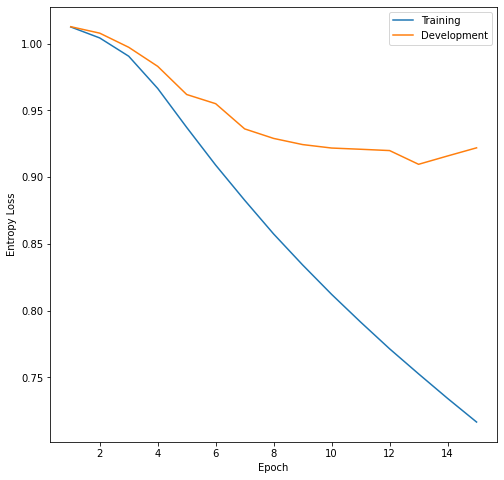

In [38]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))
ax.plot(np.arange(1,16), epoch_train_losses, label='Training')
ax.plot(np.arange(1,16), epoch_dev_losses, label='Development')
ax.legend(loc='best')
ax.set_xlabel('Epoch')
ax.set_ylabel('Entropy Loss')

The code below obtains predictions from our neural network:

In [39]:
def predict_nn(trained_model, test_loader):

    trained_model.eval()  # switch off some randomisation used during training (dropout) to give consistent predictions

    correct = 0  # count the number of correct classification labels

    gold_labs = []  # gold labels to return
    pred_labs = []  # predicted labels to return
    
    for inputs, labels in test_loader:
        test_output = trained_model(inputs)  # run the forward() function on the inputs
        predicted_labels = test_output.argmax(1)  # select the class labels with highest logits as our predictions

        gold_labs.extend(labels.tolist())
        pred_labs.extend(predicted_labels.tolist())
    
    return gold_labs, pred_labs

gold_labs_1, pred_labs_1 = predict_nn(ff_classifier_model, test_loader)

Now, we can use pretrained word embeddings instead of learning them from scratch during training.
Here, we will use the pretrained GloVe embeddings that we loaded before. The embedding matrix is used to initialise the embedding layer. The code below converts the GloVe embeddings into an embedding matrix suitable for PyTorch:

In [40]:
embedding_matrix = torch.zeros((vocab_size, glove_wv.vector_size))
for word in vocab:
    word_idx = vocab[word]
    if word in glove_wv:
        embedding_matrix[word_idx, :] = torch.from_numpy(glove_wv[word])
        
print(embedding_matrix)

C:\Users\Morg\AppData\Local\Temp\ipykernel_32888\225966899.py:5: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:212.)
  embedding_matrix[word_idx, :] = torch.from_numpy(glove_wv[word])


tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.3535,  0.0987,  0.1718,  ...,  0.4630,  1.3101,  1.1314],
        [-0.4106,  0.1487,  0.0637,  ...,  0.6097,  1.0935,  0.9614],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


The class below extends the FFTextClassifier class (it's incomplete for now -- you'll fix this in a minute!). This means that it inherits all of its functionality, but we overwrite the constructor (the `__init__` method). This way, we don't need to define the forward function again, as it will be the same as before.

The embedding layer is now different as it loads pretrained embeddings from our matrix. The argument `freeze` determines whether the embeddings remain fixed to their pretrained values (if `freeze=True`) or are updated through backpropagation to fit them to the dataset.

In [41]:
class FFTextClassifierWithEmbeddings(FFTextClassifier):

    def __init__(self, hidden_size, sequence_length, num_classes, embedding_matrix):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_matrix.shape[1] 

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=True) # embedding layer

        self.hidden_layer = nn.Linear(self.embedding_size * sequence_length, hidden_size) # Hidden layer
        self.activation = nn.ReLU() # Hidden layer activation
        self.output_layer = nn.Linear(hidden_size, num_classes) # Fully connected layer

**TO-DO 2e:** Complete the arguments in the `FFTextClassifierWithEmbeddings` constructor to set the dimensions of the neural network layers.  Repeat the experiment above using the FFTextClassifierWithEmbeddings with the GLoVe embeddings. Choose a suitable performance metric and compare the performance of the two neural text classifiers. Explain in one or two sentences the possible reason(s) for any performance differences you observe. **(3 marks)**

**ANSWER:** Accuracy on both the training and validation sets is lower for the text classifier with fixed embeddings. Furthermore, accuracy on the validation set using the embeddings does not improve from epoch 1-15. This implies that, in this case, fine-tuning the word embeddings by not freezing the embedding layer achieves better performance.

In [42]:
ff_clf_model_with_embeddings = FFTextClassifierWithEmbeddings(hidden_size, 40, num_classes, embedding_matrix)  # instatiate model
train_nn(15, ff_clf_model_with_embeddings, train_loader, dev_loader)  # train model and evaluate on dev set

Epoch: 1/15 Training Loss: 1.0078 Training Accuracy: 45.8753%
Epoch: 1/15 Validation Loss: 0.9987 Validation Accuracy: 46.3000%
Epoch: 2/15 Training Loss: 0.9780 Training Accuracy: 48.9313%
Epoch: 2/15 Validation Loss: 0.9981 Validation Accuracy: 47.3000%
Epoch: 3/15 Training Loss: 0.9657 Training Accuracy: 49.8981%
Epoch: 3/15 Validation Loss: 0.9915 Validation Accuracy: 48.0000%
Epoch: 4/15 Training Loss: 0.9568 Training Accuracy: 50.5733%
Epoch: 4/15 Validation Loss: 0.9951 Validation Accuracy: 47.2000%
Epoch: 5/15 Training Loss: 0.9494 Training Accuracy: 51.2200%
Epoch: 5/15 Validation Loss: 0.9966 Validation Accuracy: 47.4000%
Epoch: 6/15 Training Loss: 0.9426 Training Accuracy: 51.8294%
Epoch: 6/15 Validation Loss: 1.0044 Validation Accuracy: 46.9000%
Epoch: 7/15 Training Loss: 0.9372 Training Accuracy: 52.2043%
Epoch: 7/15 Validation Loss: 1.0049 Validation Accuracy: 47.6000%
Epoch: 8/15 Training Loss: 0.9321 Training Accuracy: 52.5354%
Epoch: 8/15 Validation Loss: 1.0167 Valida

FFTextClassifierWithEmbeddings(
  (embedding_layer): Embedding(43359, 25)
  (hidden_layer): Linear(in_features=1000, out_features=8, bias=True)
  (activation): ReLU()
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)

In [44]:
gold_labs_2, pred_labs_2 = predict_nn(ff_clf_model_with_embeddings, test_loader)  # make predictions on test set and store for model evaluation later

# 3. Improving the Neural Text Classifier (max. 22 marks)

This section allows you some more free reign to experiment with the neural text classifier. Below, we list several to-dos that you can solve in your own way. Please make sure to label your notebook cells clearly so that it is obvious which to-do each cell corresponds to.

**TO-DO 3a:** Consider the neural text classifiers we have just implemented and the results you obtained in the last to-do. The classifiers have a number of limitations that we could improve. Describe three limitations and how you could improve them. For each improvement you propose, provide a brief explanation (up to 1 paragraph) of how it works. 

Hint: refer to the lectures for some ideas. **(9 marks)**

**3a ANSWER:**

It is clear from to-do 2E that performance can be improved using fine-tuning. Fine-tuning backpropagates the loss to the word embeddings, adapting embeddings to this specific sentiment classification task. The training set contains 45,615 tweets and so is sufficiently large that fine-tuning is less likely to cause the model to overfit the training set.

As discussed above, the model begins to overfit after several epochs. Therefore, a weight decay argument should be added to regularise the weights by penalising the size of each weight based on the L2 norm. This will help improve generalisation of the model on unseen data. Furthermore, an early stop is implemented during training of 5 epochs. After testing model performance on the training and validation sets, this seems to be an optimal point for performance on the validation set.

The feedforward network designed has fixed weights for each input node. Therefore, a phrase with the same words and sentiment will be processed differently depending on phrase and word position in the document. Recurrent Neural Networks (RNN) and Long-short term memory (LSTM) layers address this problem by incorporating the activation from the previous token to the activation function for the current token. Thus, both methods incorporate the syntactic structure of the document. Additionally, LSTM layers incorporate a memory cell and gates, which stores context across time steps and controls information the model uses for activation at the next time step. The output of the final hidden state represents the output for the whole sequence of tokens. Performance on the sentiment classification task might be improved by incorporating this syntactic information and an LSTM layer before the fully-connected feedforward layer. It was found through validation that it was optimal to add two bi-directional LSTM layers. The resulting output from both last hidden states of both layers is concatenated and fed to the feedforward layer.

---

**TO-DO 3b:** Implement your improvements and compute the performance of your method. Make sure to comment your code to show where each new step is implemented. Use the validation set for any tuning you decide to do. Present your results clearly. **(13 marks)**

**3b ANSWER:**

First, we redefine the network architecture with the embedding layer unfrozen and the additional two bidirectional LSTM layers. Following that, the forward function is modified to reflect the architecture changes.

In [45]:
class FFTextClassifierWithImprovements(FFTextClassifier):

    def __init__(self, hidden_size, sequence_length, num_classes, embedding_matrix):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_matrix.shape[1]
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)  # embedding layer unfrozen to allow fine-tuning
        self.lstm = nn.LSTM(self.embedding_size * sequence_length, hidden_size, num_layers=2, bidirectional=True, batch_first=True)  # LSTM layer set up with 8 neurons in each hidden state. 
        self.ffwd_layer_1 = nn.Linear(hidden_size*4, hidden_size)  # Feedforward layer takes an input of size 8x4 (4 because there are 4 final hidden states in a two-layer bidirectional LSTM)
        self.activation = nn.ReLU()  # ReLU function to make output from ffwd layer non-linear
        self.output_layer = nn.Linear(hidden_size, num_classes)  # map to class labels
        
    def forward (self, input_words):

        embedded_words = self.embedding_layer(input_words)
        embedded_words = embedded_words.reshape(embedded_words.shape[0], sequence_length*self.embedding_size)  # reshape to 1D vector of length sequence length * embedding size
        lstm_out, (final_hidden_state, final_cell_state) = self.lstm(embedded_words.view(len(input_words), 1, -1))  # reshape for input to LSTM 
        final_fwd_bwd = torch.cat((final_hidden_state[0,:], final_hidden_state[1,:], final_hidden_state[2,:], final_hidden_state[3,:]), dim = 1)  # concatenating the 4 final hidden states to a 1D vector of length 32
        ffwd_output_1 = self.ffwd_layer_1(final_fwd_bwd)  # input LSTM output to the ffwd layer of 32 nodes
        z = self.activation(ffwd_output_1)  # run output through ReLU function
        output = self.output_layer(z)  # feed activations to the output layer

        return output

The next block instantiates and trains the model with added weight decay. Optimal value for weight decay determined through testing on the validation set is 1e-3

In [46]:
ff_clf_model_with_imp = FFTextClassifierWithImprovements(hidden_size, 40, num_classes, embedding_matrix)
train_nn(5, ff_clf_model_with_imp, train_loader, dev_loader, weight_decay=1e-3)  # add weight_decay. Optimal from testing on validation set was 1e-3.

Epoch: 1/5 Training Loss: 1.0264 Training Accuracy: 44.3955%
Epoch: 1/5 Validation Loss: 1.0060 Validation Accuracy: 42.8500%
Epoch: 2/5 Training Loss: 0.9879 Training Accuracy: 46.2830%
Epoch: 2/5 Validation Loss: 0.9853 Validation Accuracy: 46.1500%
Epoch: 3/5 Training Loss: 0.9231 Training Accuracy: 53.4714%
Epoch: 3/5 Validation Loss: 0.9058 Validation Accuracy: 55.5000%
Epoch: 4/5 Training Loss: 0.8426 Training Accuracy: 58.9017%
Epoch: 4/5 Validation Loss: 0.8732 Validation Accuracy: 56.2500%
Epoch: 5/5 Training Loss: 0.7809 Training Accuracy: 63.0275%
Epoch: 5/5 Validation Loss: 0.8049 Validation Accuracy: 62.5500%


FFTextClassifierWithImprovements(
  (embedding_layer): Embedding(43359, 25)
  (lstm): LSTM(1000, 8, num_layers=2, batch_first=True, bidirectional=True)
  (ffwd_layer_1): Linear(in_features=32, out_features=8, bias=True)
  (activation): ReLU()
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)

In [47]:
from sklearn.metrics import accuracy_score, f1_score
import pycm

gold_labs_3, pred_labs_3 = predict_nn(ff_clf_model_with_imp, test_loader)  # make predictions on the test set
cm = pycm.ConfusionMatrix(gold_labs_3, pred_labs_3)
print(f'PERFORMANCE ON THE TEST SET:\n\nACCURACY: {accuracy_score(gold_labs_3, pred_labs_3)}\nF1 SCORE: {f1_score(gold_labs_3, pred_labs_3, average="macro")}\n\n')
cm.print_matrix()

PERFORMANCE ON THE TEST SET:

ACCURACY: 0.572289156626506
F1 SCORE: 0.5306477844339129


Predict    0          1          2          
Actual
0          1144       2541       287        

1          566        4625       746        

2          63         1051       1261       




### Other models' performance on the test set

To compare performance and see if our improvements worked, we will run our evaluation metrics on the other two classifiers in the notebook.

#### Model with word2vec skipgram embeddings

In [48]:
cm = pycm.ConfusionMatrix(gold_labs_1, pred_labs_1)
print(f'PERFORMANCE ON THE TEST SET:\n\nACCURACY: {accuracy_score(gold_labs_1, pred_labs_1)}\nF1 SCORE: {f1_score(gold_labs_1, pred_labs_1, average="macro")}\n\n')
cm.print_matrix()

PERFORMANCE ON THE TEST SET:

ACCURACY: 0.5018723542819928
F1 SCORE: 0.43707177604215613


Predict    0          1          2          
Actual
0          571        2718       683        

1          372        4258       1307       

2          81         958        1336       




#### Model with GLoVE embeddings

In [49]:
cm = pycm.ConfusionMatrix(gold_labs_2, pred_labs_2)
print(f'PERFORMANCE ON THE TEST SET:\n\nACCURACY: {accuracy_score(gold_labs_2, pred_labs_2)}\nF1 SCORE: {f1_score(gold_labs_2, pred_labs_2, average="macro")}\n\n')
cm.print_matrix()

PERFORMANCE ON THE TEST SET:

ACCURACY: 0.43633995441224355
F1 SCORE: 0.3434437635586316


Predict    0          1          2          
Actual
0          285        2858       829        

1          170        4136       1631       

2          49         1387       939        




Our LSTM model achieves the best performance on the test set with 57% accuracy and 53% F1 score, but still does not perform exceptionally well (>70% accuracy/F1) like some state-of-the-art models. Class imbalance is one issue here with poor recall for both classes 0 and 2. More performance could potentially be extracted using self-attentive layers and transformers. Furthermore techniques that tackle the class imbalance issue could be effective in improving performance, e.g. upsampling the minority classes.